In [76]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import RegexpTokenizer
from nltk.stem import WordNetLemmatizer


In [54]:
#restore the data
%store -r bitcoin_df
%store -r ethereum_df
%store -r combined
%store -r ripple_df

In [55]:
combined.head()

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,🏦Remitano is Rewarding Every Delayed Transacti...,"Starting from ⏱February 10, 2020, Remitano wil...",Bitcoin,1585025915,remimay,0,1,True,2020-03-23
1,Veteran Trader: Bitcoin Should be Viewed as “C...,[removed],Bitcoin,1585026571,ProfessionalUnit4,8,1,True,2020-03-23
2,Bitcoin Seminars in Indian Engineering college...,The Bitcoin Seminars that were previously goin...,Bitcoin,1585026640,Uncrown,2,1,True,2020-03-23
3,Transaction not found!,Transaction not found on blockstream. Still un...,Bitcoin,1585029241,Mapleleaf760,10,1,True,2020-03-23
4,Messari CEO: Unable to measure Bitcoin's futur...,Messari CEO Ryan Selkis tweeted that given tha...,Bitcoin,1585030905,Bityardofficial,0,1,True,2020-03-23


In [64]:
ripple_df.head(2)

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
2,Daily Ripple/XRP Discussion Thread 03/25/20 [J...,Hello! It's Wednesday. Welcome to our daily di...,Ripple,1585109045,AutoModerator,52,1,True,2020-03-24
10,Ripple giving away XRP investors money (again),This is rubbing it in:\n\n[https://twitter.com...,Ripple,1585172346,rune66,17,1,True,2020-03-25


In [56]:
#check for missing data
nulls = combined.isnull().sum()

In [60]:
ripple_df.isnull().sum()

title           0
selftext        3
subreddit       0
created_utc     0
author          0
num_comments    0
score           0
is_self         0
timestamp       0
dtype: int64

In [57]:
nulls

title            0
selftext        15
subreddit        0
created_utc      0
author           0
num_comments     0
score            0
is_self          0
timestamp        0
dtype: int64

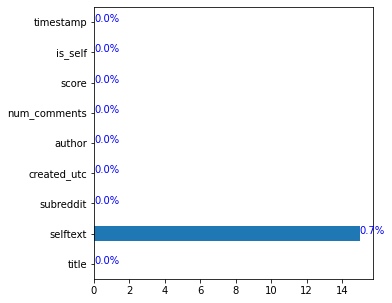

In [79]:
nulls.plot(kind = 'barh', figsize = (5,5))
for x,y in enumerate(nulls):
    plt.annotate(str(round(((y/2051)*100), 1)) + '%',  xy = (y,x), color = 'b', size =10)

In [61]:
#drop missing values
combined.dropna(inplace = True)
ripple_df.dropna(inplace = True)

In [39]:
combined.shape

(4069, 9)

In [62]:
ripple_df.shape

(643, 9)

In [63]:
# remove rows with duplicated author 
combined.drop_duplicates(subset='author',inplace=True)
ripple_df.drop_duplicates(subset = 'author', inplace = True)
print(combined.shape)
print(ripple_df.shape)

(3020, 9)
(355, 9)


In [42]:
combined['is_self'].value_counts()

True    3020
Name: is_self, dtype: int64

In [65]:
#convert the subreddit class to a binary
combined['subreddit'] = combined['subreddit'].apply(lambda x: 1 if x == 'Bitcoin' else 0)
ripple_df['subreddit'] = 1

In [67]:
ripple_df.head(1)

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
2,Daily Ripple/XRP Discussion Thread 03/25/20 [J...,Hello! It's Wednesday. Welcome to our daily di...,1,1585109045,AutoModerator,52,1,True,2020-03-24


In [68]:
combined.head()

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,🏦Remitano is Rewarding Every Delayed Transacti...,"Starting from ⏱February 10, 2020, Remitano wil...",1,1585025915,remimay,0,1,True,2020-03-23
1,Veteran Trader: Bitcoin Should be Viewed as “C...,[removed],1,1585026571,ProfessionalUnit4,8,1,True,2020-03-23
2,Bitcoin Seminars in Indian Engineering college...,The Bitcoin Seminars that were previously goin...,1,1585026640,Uncrown,2,1,True,2020-03-23
3,Transaction not found!,Transaction not found on blockstream. Still un...,1,1585029241,Mapleleaf760,10,1,True,2020-03-23
4,Messari CEO: Unable to measure Bitcoin's futur...,Messari CEO Ryan Selkis tweeted that given tha...,1,1585030905,Bityardofficial,0,1,True,2020-03-23


In [69]:
#drop unnecessary columns
combined.drop(columns = ['created_utc', 'timestamp', 'is_self', 'author', 'num_comments', 'score'], inplace = True)
ripple_df.drop(columns = ['created_utc', 'timestamp', 'is_self', 'author', 'num_comments', 'score'], inplace = True)

In [74]:
combined.head(2) #check for the changes

,title,selftext,subreddit
0,🏦Remitano is Rewarding Every Delayed Transacti...,"Starting from ⏱February 10, 2020, Remitano wil...",1
1,Veteran Trader: Bitcoin Should be Viewed as “C...,[removed],1


In [71]:
ripple_df.head(2)

,title,selftext,subreddit
2,Daily Ripple/XRP Discussion Thread 03/25/20 [J...,Hello! It's Wednesday. Welcome to our daily di...,1
10,Ripple giving away XRP investors money (again),This is rubbing it in:\n\n[https://twitter.com...,1


In [72]:
%store combined
%store ripple_df

Stored 'combined' (DataFrame)
Stored 'ripple_df' (DataFrame)
